
    Title: "Week7"
    author: "Srikar Polasanapalli"
    date: "September 22, 2019"
    output: word_document


In [4]:
library(PerformanceAnalytics)
library(xts)
library(lubridate)

In [5]:
# load data and create an xts dataset
fund<-read.csv("contrafund.csv")
fund$Date<-mdy(fund$Date)
fund2<-fund[order(fund$Date),]
#create an xts dataset
All.dat<-xts(fund2[,-1],order.by=fund2[,1],)


,ContraRet,Market.Return,Risk.Free
Cumulative Return,141.5677,69.29182,4.072008


,ContraRet
"StdDev Sharpe (Rf=0.4%, p=95%):",0.19010682
"VaR Sharpe (Rf=0.4%, p=95%):",0.12900607
"ES Sharpe (Rf=0.4%, p=95%):",0.05971594


[1] 0.1005838


Call:
lm(formula = FundExcess ~ MktExcess, data = All.dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.087553 -0.009588  0.001373  0.010343  0.060880 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0021850  0.0008362   2.613  0.00927 ** 
MktExcess   0.9013625  0.0188580  47.797  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01777 on 460 degrees of freedom
Multiple R-squared:  0.8324,	Adjusted R-squared:  0.832 
F-statistic:  2285 on 1 and 460 DF,  p-value: < 2.2e-16


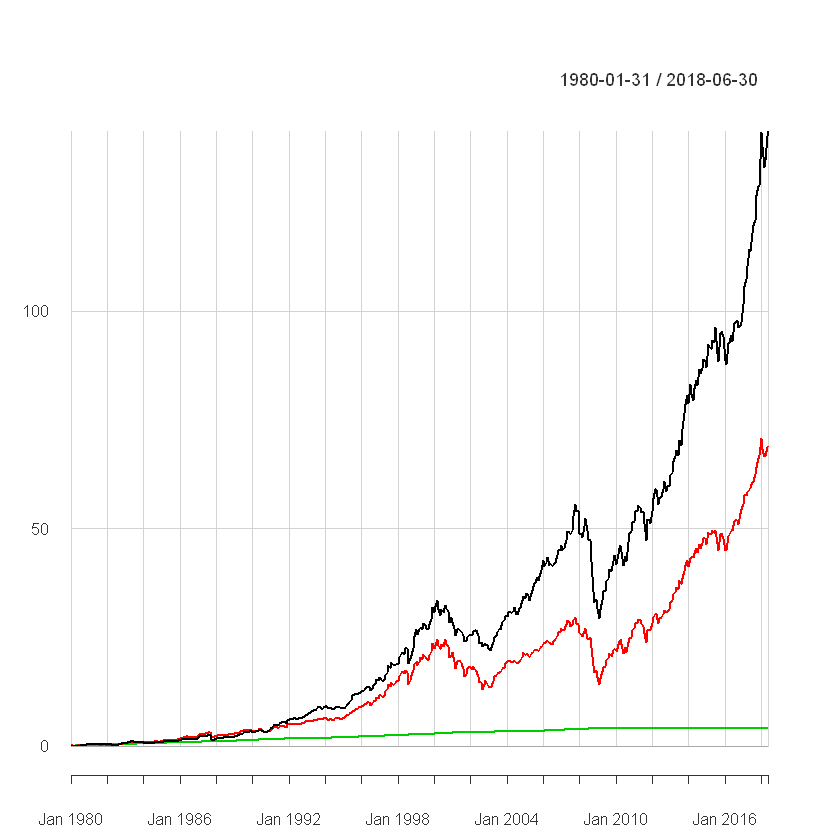

In [6]:
Return.cumulative(All.dat, geometric =TRUE)
chart.CumReturns(All.dat, wealth.index =FALSE, geometric = TRUE)

SharpeRatio(All.dat$ContraRet,All.dat$Risk.Free)
TreynorRatio(All.dat$ContraRet,All.dat$Market.Return,All.dat$Risk.Free)

All.dat<-transform(All.dat,MktExcess=Market.Return-Risk.Free,FundExcess=ContraRet-Risk.Free)

Alpha=lm(FundExcess~MktExcess,data=All.dat)
summary(Alpha)